In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [2]:
df = pd.read_csv('data/Resultados__nicos_Saber_Pro_20240719.csv')
df

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0          20183   EK201830011083                 CC         COLOMBIA   
1          20183   EK201830053875                 CC         COLOMBIA   
2          20183   EK201830167993                 CC         COLOMBIA   
3          20183   EK201830168158                 CC         COLOMBIA   
4          20183   EK201830164354                 CC         COLOMBIA   
...          ...              ...                ...              ...   
1217477    20222   EK202220148630                 CC         COLOMBIA   
1217478    20222   EK202220164335                 CC         COLOMBIA   
1217479    20222   EK202220142587                 CC         COLOMBIA   
1217480    20222   EK202220116355                 CC         COLOMBIA   
1217481    20222   EK202220153024                 CC         COLOMBIA   

         ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                         11.0            BOGOTÁ                11001.0   
1                         76.0             VALLE                76736.0   
2                         73.0            TOLIMA                73001.0   
3                         68.0         SANTANDER                68081.0   
4                         11.0            BOGOTÁ                11001.0   
...                        ...               ...                    ...   
1217477                   41.0             HUILA                41396.0   
1217478                   54.0   NORTE SANTANDER                54810.0   
1217479                   11.0            BOGOTÁ                11001.0   
1217480                    5.0         ANTIOQUIA                 5001.0   
1217481                   76.0             VALLE                76001.0   

        ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0             BOGOTÁ D.C.                        NaN   
1                 SEVILLA                        NaN   
2                  IBAGUÉ               1.730010e+11   
3         BARRANCABERMEJA               1.680810e+11   
4             BOGOTÁ D.C.               1.110010e+11   
...                   ...                        ...   
1217477          LA PLATA               2.413960e+11   
1217478              TIBÚ               1.548100e+11   
1217479       BOGOTÁ D.C.               3.230010e+11   
1217480          MEDELLÍN               1.050010e+11   
1217481              CALI                        NaN   

         ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
0                                NaN  ...                  Si   
1                                NaN  ...                  Si   
2                            73001.0  ...                  Si   
3                            68081.0  ...                  Si   
4                            11001.0  ...                  Si   
...                              ...  ...                 ...   
1217477                      41396.0  ...                  Si   
1217478                      54810.0  ...                  No   
1217479                      23001.0  ...                  Si   
1217480                       5001.0  ...                  Si   
1217481                          NaN  ...                 NaN   

                          FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0        Secundaria (Bachillerato) incompleta  NO OFICIAL - CORPORACIÓN   
1        Secundaria (Bachillerato) incompleta     OFICIAL DEPARTAMENTAL   
2                                     No sabe  NO OFICIAL - CORPORACIÓN   
3              Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
4              Educación profesional completa     OFICIAL DEPARTAMENTAL   
...                                       ...                       ...   
1217477                   Primaria incompleta          OFICIAL NACIONAL   
1217478                     Primaria completa    NO OFICIAL - FUNDACIÓN   
1217479    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
1217480  Secundaria (Bachil

In [3]:
df['ESTU_NUCLEO_PREGRADO'].unique()

array(['ADMINISTRACIÓN', 'CONTADURÍA PUBLICA',
       'INGENIERÍA AMBIENTAL, SANITARIA Y AFINES',
       'BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y HUMANAS',
       'PSICOLOGÍA', 'INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES',
       'DISEÑO', 'BIOLOGÍA, MICROBIOLOGÍA Y AFINES', 'DERECHO Y AFINES',
       'EDUCACIÓN', 'INGENIERÍA CIVIL Y AFINES',
       'INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AFINES', 'MEDICINA',
       'INGENIERÍA QUÍMICA Y AFINES',
       'GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES', 'ENFERMERÍA',
       'COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES',
       'INGENIERÍA INDUSTRIAL Y AFINES', 'ODONTOLOGÍA',
       'SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES',
       'INGENIERÍA BIOMÉDICA Y AFINES', 'ECONOMÍA', 'TERAPIAS',
       'INGENIERÍA AGRÍCOLA, FORESTAL Y AFINES', 'GEOGRAFÍA, HISTORIA',
       'AGRONOMÍA', 'LENGUAS MODERNAS, LITERATURA, LINGÜÍSTICA Y AFINES',
       'INGENIERÍA MECÁNICA Y AFINES', 'NUTRICIÓN Y DIETÉTICA',
       'SALUD PUBLICA', 'QUÍMICA Y AF

In [4]:
df.isnull().sum()

PERIODO                                0
ESTU_CONSECUTIVO                       0
ESTU_TIPODOCUMENTO                     0
ESTU_PAIS_RESIDE                       0
ESTU_COD_RESIDE_DEPTO               3393
ESTU_DEPTO_RESIDE                   3393
ESTU_COD_RESIDE_MCPIO               3393
ESTU_MCPIO_RESIDE                   3393
ESTU_CODDANE_COLE_TERMINO         400042
ESTU_COD_COLE_MCPIO_TERMINO       400042
ESTU_COD_DEPTO_PRESENTACION          104
INST_COD_INSTITUCION                   0
INST_NOMBRE_INSTITUCION                0
INST_CARACTER_ACADEMICO                0
ESTU_NUCLEO_PREGRADO                   0
ESTU_INST_DEPARTAMENTO                 0
ESTU_INST_CODMUNICIPIO                 0
ESTU_INST_MUNICIPIO                    0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_PRGM_CODMUNICIPIO                 0
ESTU_PRGM_MUNICIPIO                    0
ESTU_NIVEL_PRGM_ACADEMICO              0
ESTU_METODO_PRGM                       0
ESTU_VALORMATRIC

## Limpieza de los datos

1. Tomar únicamente los datos donde el pais donde reside el estudiante sea Colombia
2. Por facilidades, eliminar todos los datos nulos

In [3]:
df['ESTU_PAIS_RESIDE'].unique()

array(['COLOMBIA', 'VIETNAM', 'ESTADOS UNIDOS', 'SANTA LUCÍA', 'ECUADOR',
       'VENEZUELA', 'COMORAS', 'CURAZAO', 'MÉXICO', 'FRANCIA', 'BRASIL',
       'COREA DEL NORTE', 'PERÚ', 'ITALIA', 'ALEMANIA', 'CUBA', 'PANAMÁ',
       'CHILE', 'PORTUGAL', 'COREA DEL SUR', 'RUSIA', 'ESPAÑA',
       'ARGENTINA', 'ESTADOS FEDERADOS DE MICRONESIA', 'BÉLGICA', 'KENIA',
       'BOLIVIA', 'NICARAGUA', 'ISRAEL', 'EL SALVADOR', 'JAPÓN',
       'UCRANIA', 'MARRUECOS', 'COSTA RICA', 'REINO UNIDO',
       'PAÍSES BAJOS - HOLANDA', 'CAMERÚN', 'DINAMARCA', 'URUGUAY',
       'CHINA', 'POLONIA', 'ARMENIA', 'HAITI', 'GUATEMALA', 'SUIZA',
       'TURQUÍA', 'PUERTO RICO', 'AZERBAIYÁN', 'CANADÁ', 'HONDURAS',
       'PARAGUAY', 'REPÚBLICA DOMINICANA', 'OMÁN',
       'TERRITORIOS PALESTINOS', 'DOMINICA', 'CABO VERDE', 'CROACIA',
       'INDIA', 'NORUEGA', 'VANUATU', 'UGANDA', 'BIELORRUSIA', 'ALBANIA',
       'BURKINA FASO', 'REPÚBLICA DEMOCRÁTICA DEL CONGO', 'GABÓN',
       'MOZAMBIQUE', 'TANZANIA', 'AUSTRIA', 'ZI

In [4]:
df = df[df['ESTU_PAIS_RESIDE'] == 'COLOMBIA']
df

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0          20183   EK201830011083                 CC         COLOMBIA   
1          20183   EK201830053875                 CC         COLOMBIA   
2          20183   EK201830167993                 CC         COLOMBIA   
3          20183   EK201830168158                 CC         COLOMBIA   
4          20183   EK201830164354                 CC         COLOMBIA   
...          ...              ...                ...              ...   
1217477    20222   EK202220148630                 CC         COLOMBIA   
1217478    20222   EK202220164335                 CC         COLOMBIA   
1217479    20222   EK202220142587                 CC         COLOMBIA   
1217480    20222   EK202220116355                 CC         COLOMBIA   
1217481    20222   EK202220153024                 CC         COLOMBIA   

         ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                         11.0            BOGOTÁ                11001.0   
1                         76.0             VALLE                76736.0   
2                         73.0            TOLIMA                73001.0   
3                         68.0         SANTANDER                68081.0   
4                         11.0            BOGOTÁ                11001.0   
...                        ...               ...                    ...   
1217477                   41.0             HUILA                41396.0   
1217478                   54.0   NORTE SANTANDER                54810.0   
1217479                   11.0            BOGOTÁ                11001.0   
1217480                    5.0         ANTIOQUIA                 5001.0   
1217481                   76.0             VALLE                76001.0   

        ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0             BOGOTÁ D.C.                        NaN   
1                 SEVILLA                        NaN   
2                  IBAGUÉ               1.730010e+11   
3         BARRANCABERMEJA               1.680810e+11   
4             BOGOTÁ D.C.               1.110010e+11   
...                   ...                        ...   
1217477          LA PLATA               2.413960e+11   
1217478              TIBÚ               1.548100e+11   
1217479       BOGOTÁ D.C.               3.230010e+11   
1217480          MEDELLÍN               1.050010e+11   
1217481              CALI                        NaN   

         ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
0                                NaN  ...                  Si   
1                                NaN  ...                  Si   
2                            73001.0  ...                  Si   
3                            68081.0  ...                  Si   
4                            11001.0  ...                  Si   
...                              ...  ...                 ...   
1217477                      41396.0  ...                  Si   
1217478                      54810.0  ...                  No   
1217479                      23001.0  ...                  Si   
1217480                       5001.0  ...                  Si   
1217481                          NaN  ...                 NaN   

                          FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0        Secundaria (Bachillerato) incompleta  NO OFICIAL - CORPORACIÓN   
1        Secundaria (Bachillerato) incompleta     OFICIAL DEPARTAMENTAL   
2                                     No sabe  NO OFICIAL - CORPORACIÓN   
3              Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
4              Educación profesional completa     OFICIAL DEPARTAMENTAL   
...                                       ...                       ...   
1217477                   Primaria incompleta          OFICIAL NACIONAL   
1217478                     Primaria completa    NO OFICIAL - FUNDACIÓN   
1217479    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
1217480  Secundaria (Bachil

In [6]:
depto_col = ['BOGOTÁ', 'VALLE', 'TOLIMA', 'SANTANDER', 'SUCRE', 'ANTIOQUIA',
       'BOYACA', 'CAUCA', 'HUILA', 'CUNDINAMARCA', 'CORDOBA', 'ATLANTICO',
       'BOLIVAR', 'ARAUCA', 'NORTE SANTANDER', 'CALDAS', 'RISARALDA',
       'CESAR', 'QUINDIO', 'MAGDALENA', 'CHOCO', 'LA GUAJIRA', 'META',
	'CAQUETA', 'NARIÑO', 'PUTUMAYO', 'AMAZONAS', 'CASANARE',
       'SAN ANDRES', 'GUAVIARE', 'GUAINIA', 'VAUPES', 'VICHADA']

df = df[df['ESTU_DEPTO_RESIDE'].isin(depto_col)]

In [7]:
df.isnull().sum()

PERIODO                                0
ESTU_CONSECUTIVO                       0
ESTU_TIPODOCUMENTO                     0
ESTU_PAIS_RESIDE                       0
ESTU_COD_RESIDE_DEPTO                  0
ESTU_DEPTO_RESIDE                      0
ESTU_COD_RESIDE_MCPIO                  0
ESTU_MCPIO_RESIDE                      0
ESTU_CODDANE_COLE_TERMINO         394295
ESTU_COD_COLE_MCPIO_TERMINO       394295
ESTU_COD_DEPTO_PRESENTACION          103
INST_COD_INSTITUCION                   0
INST_NOMBRE_INSTITUCION                0
INST_CARACTER_ACADEMICO                0
ESTU_NUCLEO_PREGRADO                   0
ESTU_INST_DEPARTAMENTO                 0
ESTU_INST_CODMUNICIPIO                 0
ESTU_INST_MUNICIPIO                    0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_PRGM_CODMUNICIPIO                 0
ESTU_PRGM_MUNICIPIO                    0
ESTU_NIVEL_PRGM_ACADEMICO              0
ESTU_METODO_PRGM                       0
ESTU_VALORMATRIC

In [8]:
df = df.dropna(ignore_index=True)
df

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0         20183   EK201830167993                 CC         COLOMBIA   
1         20183   EK201830168158                 CC         COLOMBIA   
2         20183   EK201830164354                 CC         COLOMBIA   
3         20183   EK201830129217                 CC         COLOMBIA   
4         20183   EK201830138320                 CC         COLOMBIA   
...         ...              ...                ...              ...   
711860    20222   EK202220206584                 CC         COLOMBIA   
711861    20222   EK202220148630                 CC         COLOMBIA   
711862    20222   EK202220164335                 CC         COLOMBIA   
711863    20222   EK202220142587                 CC         COLOMBIA   
711864    20222   EK202220116355                 CC         COLOMBIA   

        ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                        73.0            TOLIMA                73001.0   
1                        68.0         SANTANDER                68081.0   
2                        11.0            BOGOTÁ                11001.0   
3                        70.0             SUCRE                70001.0   
4                        11.0            BOGOTÁ                11001.0   
...                       ...               ...                    ...   
711860                   11.0            BOGOTÁ                11001.0   
711861                   41.0             HUILA                41396.0   
711862                   54.0   NORTE SANTANDER                54810.0   
711863                   11.0            BOGOTÁ                11001.0   
711864                    5.0         ANTIOQUIA                 5001.0   

       ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0                 IBAGUÉ               1.730010e+11   
1        BARRANCABERMEJA               1.680810e+11   
2            BOGOTÁ D.C.               1.110010e+11   
3              SINCELEJO               1.700010e+11   
4            BOGOTÁ D.C.               3.110010e+11   
...                  ...                        ...   
711860       BOGOTÁ D.C.               2.111020e+11   
711861          LA PLATA               2.413960e+11   
711862              TIBÚ               1.548100e+11   
711863       BOGOTÁ D.C.               3.230010e+11   
711864          MEDELLÍN               1.050010e+11   

        ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
0                           73001.0  ...                  Si   
1                           68081.0  ...                  Si   
2                           11001.0  ...                  Si   
3                           70001.0  ...                  No   
4                           11001.0  ...                  Si   
...                             ...  ...                 ...   
711860                      11001.0  ...                  Si   
711861                      41396.0  ...                  Si   
711862                      54810.0  ...                  No   
711863                      23001.0  ...                  Si   
711864                       5001.0  ...                  Si   

                         FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0                                    No sabe  NO OFICIAL - CORPORACIÓN   
1             Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
2             Educación profesional completa     OFICIAL DEPARTAMENTAL   
3                                    Ninguno  NO OFICIAL - CORPORACIÓN   
4           Técnica o tecnológica incompleta    NO OFICIAL - FUNDACIÓN   
...                                      ...                       ...   
711860    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
711861                   Primaria incompleta          OFICIAL NACIONAL   
711862                     Primaria completa    NO OFICIAL - FUNDACIÓN   
711863    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
711864  Se

In [9]:
1217482 - 711865

505617

In [13]:
df.to_csv('data/Resultados_Saber_Pro_nonull.csv', index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711865 entries, 2 to 1217480
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         711865 non-null  int64  
 1   ESTU_CONSECUTIVO                711865 non-null  object 
 2   ESTU_TIPODOCUMENTO              711865 non-null  object 
 3   ESTU_PAIS_RESIDE                711865 non-null  object 
 4   ESTU_COD_RESIDE_DEPTO           711865 non-null  float64
 5   ESTU_DEPTO_RESIDE               711865 non-null  object 
 6   ESTU_COD_RESIDE_MCPIO           711865 non-null  float64
 7   ESTU_MCPIO_RESIDE               711865 non-null  object 
 8   ESTU_CODDANE_COLE_TERMINO       711865 non-null  float64
 9   ESTU_COD_COLE_MCPIO_TERMINO     711865 non-null  float64
 10  ESTU_COD_DEPTO_PRESENTACION     711865 non-null  float64
 11  INST_COD_INSTITUCION            711865 non-null  int64  
 12  INST_NOMBRE_INSTITUC

In [16]:
pd.read_csv('data/Resultados_Saber_Pro_nonull.csv', index_col=0)

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0         20183   EK201830167993                 CC         COLOMBIA   
1         20183   EK201830168158                 CC         COLOMBIA   
2         20183   EK201830164354                 CC         COLOMBIA   
3         20183   EK201830129217                 CC         COLOMBIA   
4         20183   EK201830138320                 CC         COLOMBIA   
...         ...              ...                ...              ...   
711860    20222   EK202220206584                 CC         COLOMBIA   
711861    20222   EK202220148630                 CC         COLOMBIA   
711862    20222   EK202220164335                 CC         COLOMBIA   
711863    20222   EK202220142587                 CC         COLOMBIA   
711864    20222   EK202220116355                 CC         COLOMBIA   

        ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                        73.0            TOLIMA                73001.0   
1                        68.0         SANTANDER                68081.0   
2                        11.0            BOGOTÁ                11001.0   
3                        70.0             SUCRE                70001.0   
4                        11.0            BOGOTÁ                11001.0   
...                       ...               ...                    ...   
711860                   11.0            BOGOTÁ                11001.0   
711861                   41.0             HUILA                41396.0   
711862                   54.0   NORTE SANTANDER                54810.0   
711863                   11.0            BOGOTÁ                11001.0   
711864                    5.0         ANTIOQUIA                 5001.0   

       ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0                 IBAGUÉ               1.730010e+11   
1        BARRANCABERMEJA               1.680810e+11   
2            BOGOTÁ D.C.               1.110010e+11   
3              SINCELEJO               1.700010e+11   
4            BOGOTÁ D.C.               3.110010e+11   
...                  ...                        ...   
711860       BOGOTÁ D.C.               2.111020e+11   
711861          LA PLATA               2.413960e+11   
711862              TIBÚ               1.548100e+11   
711863       BOGOTÁ D.C.               3.230010e+11   
711864          MEDELLÍN               1.050010e+11   

        ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
0                           73001.0  ...                  Si   
1                           68081.0  ...                  Si   
2                           11001.0  ...                  Si   
3                           70001.0  ...                  No   
4                           11001.0  ...                  Si   
...                             ...  ...                 ...   
711860                      11001.0  ...                  Si   
711861                      41396.0  ...                  Si   
711862                      54810.0  ...                  No   
711863                      23001.0  ...                  Si   
711864                       5001.0  ...                  Si   

                         FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0                                    No sabe  NO OFICIAL - CORPORACIÓN   
1             Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
2             Educación profesional completa     OFICIAL DEPARTAMENTAL   
3                                    Ninguno  NO OFICIAL - CORPORACIÓN   
4           Técnica o tecnológica incompleta    NO OFICIAL - FUNDACIÓN   
...                                      ...                       ...   
711860    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
711861                   Primaria incompleta          OFICIAL NACIONAL   
711862                     Primaria completa    NO OFICIAL - FUNDACIÓN   
711863    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
711864  Se

## Ver correlaciones de todas las variables

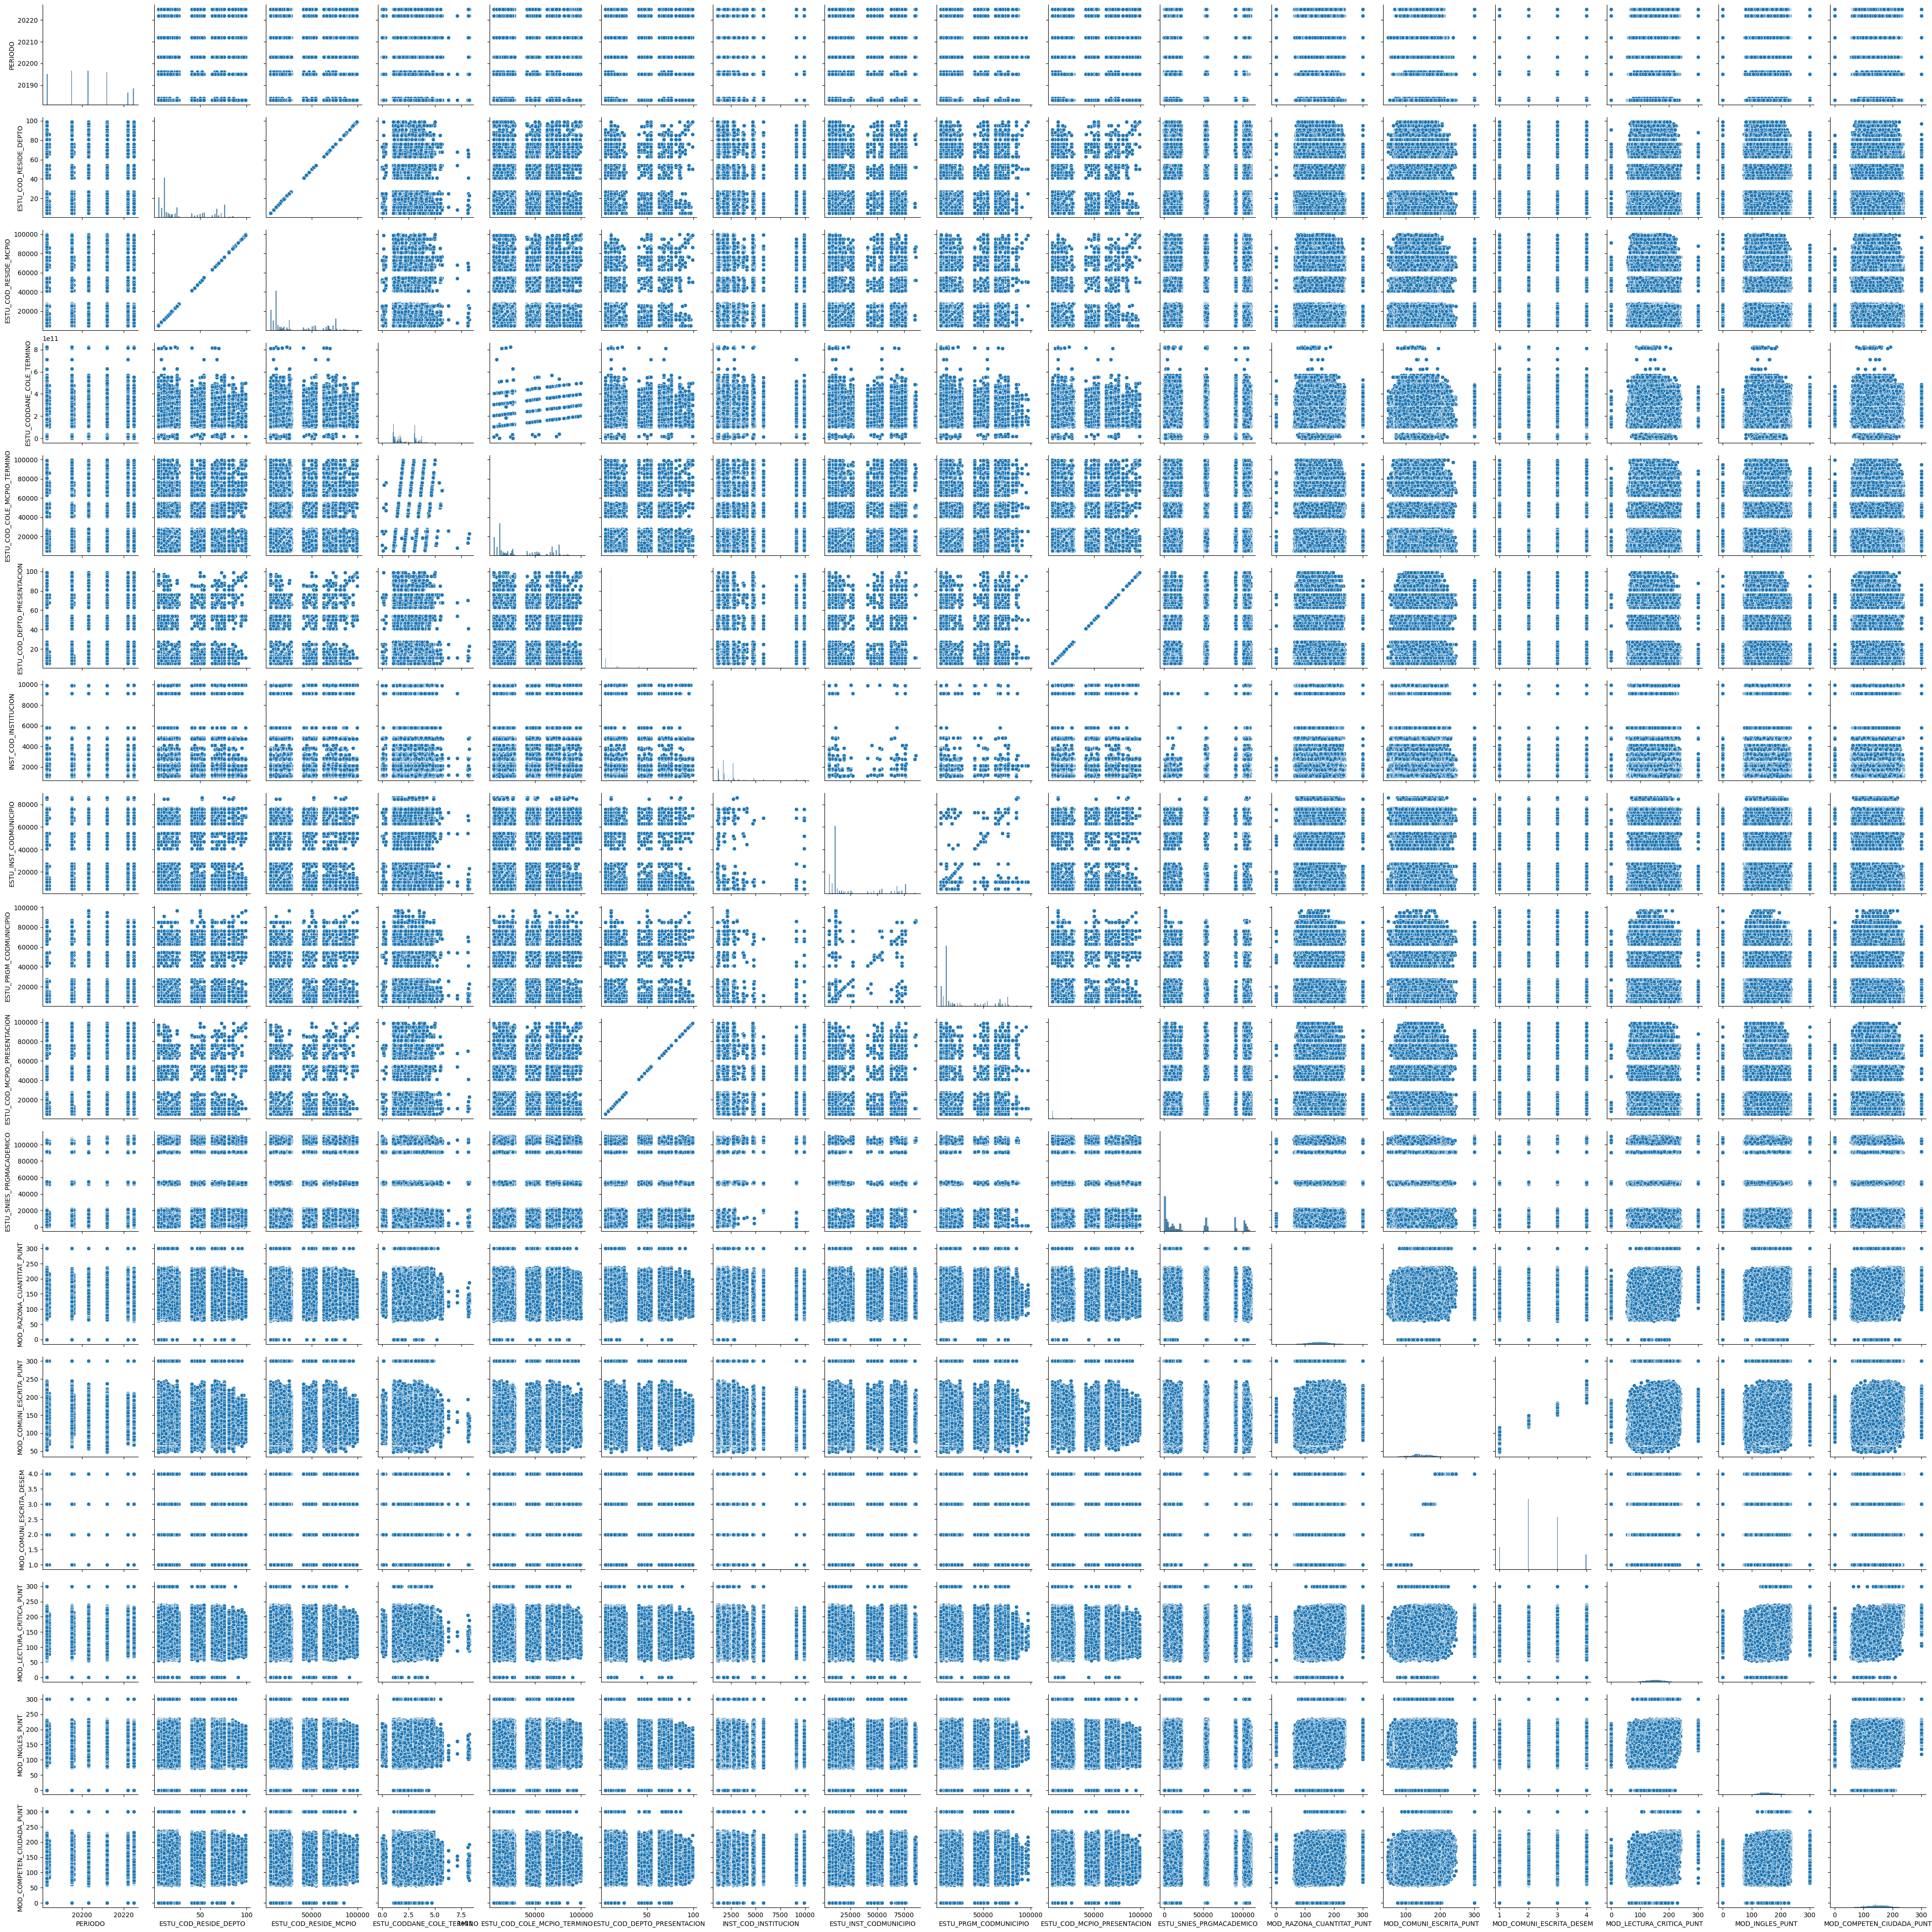

In [54]:
sns.pairplot(df)

In [32]:
df[['ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO']].drop_duplicates(ignore_index=True).sort_values('ESTU_COD_RESIDE_DEPTO', ascending=False)

ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO
32           VICHADA                   99.0
31            VAUPES                   97.0
28          GUAVIARE                   95.0
30           GUAINIA                   94.0
24          AMAZONAS                   91.0
27        SAN ANDRES                   88.0
23          PUTUMAYO                   86.0
25          CASANARE                   85.0
17            ARAUCA                   81.0
4              VALLE                   76.0
0             TOLIMA                   73.0
3              SUCRE                   70.0
1          SANTANDER                   68.0
16         RISARALDA                   66.0
15           QUINDIO                   63.0
14   NORTE SANTANDER                   54.0
22            NARIÑO                   52.0
20              META                   50.0
19         MAGDALENA                   47.0
18        LA GUAJIRA                   44.0
8              HUILA                   41.0
29             CHOCO                   27.0
9       CUNDINAMARCA                   25.0
10           CORDOBA                   23.0
26             CESAR                   20.0
7              CAUCA                   19.0
21           CAQUETA                   18.0
13            CALDAS                   17.0
6             BOYACA                   15.0
12           BOLIVAR                   13.0
2             BOGOTÁ                   11.0
11         ATLANTICO                    8.0
5          ANTIOQUIA                    5.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211306 entries, 0 to 1217481
Data columns (total 57 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   PERIODO                         1211306 non-null  int64  
 1   ESTU_CONSECUTIVO                1211306 non-null  object 
 2   ESTU_TIPODOCUMENTO              1211306 non-null  object 
 3   ESTU_PAIS_RESIDE                1211306 non-null  object 
 4   ESTU_COD_RESIDE_DEPTO           1211306 non-null  float64
 5   ESTU_DEPTO_RESIDE               1211306 non-null  object 
 6   ESTU_COD_RESIDE_MCPIO           1211306 non-null  float64
 7   ESTU_MCPIO_RESIDE               1211306 non-null  object 
 8   ESTU_CODDANE_COLE_TERMINO       817011 non-null   float64
 9   ESTU_COD_COLE_MCPIO_TERMINO     817011 non-null   float64
 10  ESTU_COD_DEPTO_PRESENTACION     1211203 non-null  float64
 11  INST_COD_INSTITUCION            1211306 non-null  int64  
 12  INST_

In [33]:
sorted(df['PERIODO'].unique())

[20183, 20184, 20195, 20196, 20203, 20212, 20222, 20225]

<Axes: xlabel='PERIODO', ylabel='MOD_INGLES_PUNT'>

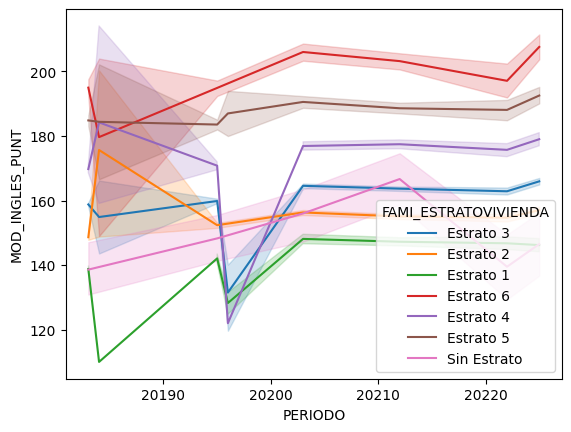

In [37]:
sub_df = df[df['ESTU_INST_DEPARTAMENTO'] == 'ANTIOQUIA']

sns.lineplot(sub_df, x='PERIODO', y='MOD_INGLES_PUNT', hue='FAMI_ESTRATOVIVIENDA')

<Axes: xlabel='MOD_INGLES_PUNT', ylabel='Count'>

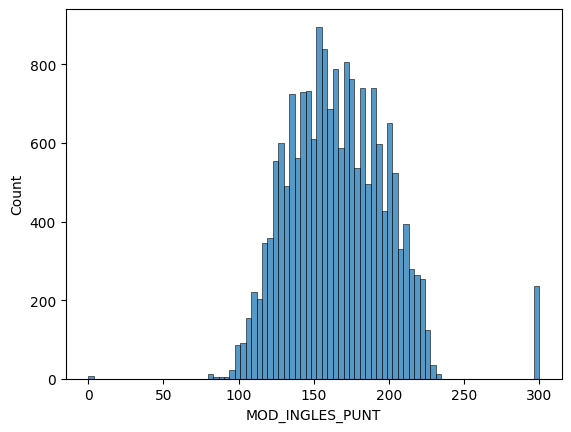

In [92]:
sns.histplot(sub_df[sub_df['PERIODO'] == 20203], x='MOD_INGLES_PUNT')

<Axes: xlabel='PERIODO', ylabel='MOD_INGLES_PUNT'>

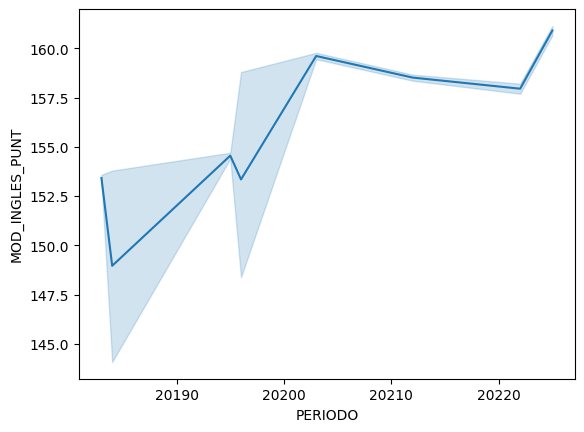

In [83]:
sns.lineplot(df, x='PERIODO', y='MOD_INGLES_PUNT')

In [84]:
len(df['INST_NOMBRE_INSTITUCION'].unique())

267

In [79]:
df_estrato = copy(df)

df_estrato.replace({
	'Estrato 1': 1,
	'Estrato 2': 2,
	'Estrato 3': 3,
	'Estrato 4': 4,
	'Estrato 5': 5,
	'Estrato 6': 6,
	'Sin Estrato': 0
})

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
2          20183   EK201830167993                 CC         COLOMBIA   
3          20183   EK201830168158                 CC         COLOMBIA   
4          20183   EK201830164354                 CC         COLOMBIA   
5          20183   EK201830129217                 CC         COLOMBIA   
6          20183   EK201830138320                 CC         COLOMBIA   
...          ...              ...                ...              ...   
1217475    20222   EK202220206584                 CC         COLOMBIA   
1217477    20222   EK202220148630                 CC         COLOMBIA   
1217478    20222   EK202220164335                 CC         COLOMBIA   
1217479    20222   EK202220142587                 CC         COLOMBIA   
1217480    20222   EK202220116355                 CC         COLOMBIA   

         ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
2                         73.0            TOLIMA                73001.0   
3                         68.0         SANTANDER                68081.0   
4                         11.0            BOGOTÁ                11001.0   
5                         70.0             SUCRE                70001.0   
6                         11.0            BOGOTÁ                11001.0   
...                        ...               ...                    ...   
1217475                   11.0            BOGOTÁ                11001.0   
1217477                   41.0             HUILA                41396.0   
1217478                   54.0   NORTE SANTANDER                54810.0   
1217479                   11.0            BOGOTÁ                11001.0   
1217480                    5.0         ANTIOQUIA                 5001.0   

        ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
2                  IBAGUÉ               1.730010e+11   
3         BARRANCABERMEJA               1.680810e+11   
4             BOGOTÁ D.C.               1.110010e+11   
5               SINCELEJO               1.700010e+11   
6             BOGOTÁ D.C.               3.110010e+11   
...                   ...                        ...   
1217475       BOGOTÁ D.C.               2.111020e+11   
1217477          LA PLATA               2.413960e+11   
1217478              TIBÚ               1.548100e+11   
1217479       BOGOTÁ D.C.               3.230010e+11   
1217480          MEDELLÍN               1.050010e+11   

         ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
2                            73001.0  ...                  Si   
3                            68081.0  ...                  Si   
4                            11001.0  ...                  Si   
5                            70001.0  ...                  No   
6                            11001.0  ...                  Si   
...                              ...  ...                 ...   
1217475                      11001.0  ...                  Si   
1217477                      41396.0  ...                  Si   
1217478                      54810.0  ...                  No   
1217479                      23001.0  ...                  Si   
1217480                       5001.0  ...                  Si   

                          FAMI_EDUCACIONMADRE               INST_ORIGEN  \
2                                     No sabe  NO OFICIAL - CORPORACIÓN   
3              Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
4              Educación profesional completa     OFICIAL DEPARTAMENTAL   
5                                     Ninguno  NO OFICIAL - CORPORACIÓN   
6            Técnica o tecnológica incompleta    NO OFICIAL - FUNDACIÓN   
...                                       ...                       ...   
1217475    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
1217477                   Primaria incompleta          OFICIAL NACIONAL   
1217478                     Primaria completa    NO OFICIAL - FUNDACIÓN   
1217479    Secundaria (Bach

In [ ]:
df_estrato['']